# Logistic Regression (Classification)

## 01. Load Data

In [1]:
import numpy as np 
import pandas as pd 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

## 02. Analyze Data

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Features

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
X,Y = data.data,data.target 
N,D = X.shape
(N,D)

(569, 30)

In [8]:
#(num_samples x num_dimensions)
X = X.reshape(N,D)
Y = Y.reshape(N,1)

## 03. Preprocess Data

### Split Data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33)

In [10]:
(X_train.shape,Y_train.shape)

((381, 30), (381, 1))

In [11]:
(X_test.shape,Y_test.shape)

((188, 30), (188, 1))

### Scale the Data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
#scale training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
#scale testing data
X_test_scaled = scaler.transform(X_test)

## 04. Create Model

### Linear Binary Classification Model 

$ a = w_1x_1 + w_2x_2 + b$

$if\; a \geq 0 \rightarrow 1$

$if\; a < 0 \rightarrow 0 $

### Sigmod Function 

Probability Interpratation. Output range $(0,1)$

Every Linear Function putting in top of it the sigmoid function, it becomes a **Logistic Function**

In [15]:
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

### Loss Function

Binary Cross-Entropy Loss

In [16]:
criterion = nn.BCELoss()

### Optimizer

Adam Optimizer 

In [17]:
optimizer = torch.optim.Adam(model.parameters())

## 05. Train Model 

### Change inputs/outputs to torch tensors

In [18]:
'''
Pytorch does not work with Numpy Arrays, but with Torch Tensors
Pytorch uses float32 by default, Numpy Creates float64 by default 
'''
inputs = torch.from_numpy(X_train_scaled.astype(np.float32))
targets = torch.from_numpy(Y_train.astype(np.float32))

In [19]:
test_inputs = torch.from_numpy(X_test_scaled.astype(np.float32))
test_targets = torch.from_numpy(Y_test.astype(np.float32))

In [20]:
n_epochs = 1000 
train_losses = []
test_losses = []

In [21]:

for it in range(n_epochs):
  #zero the parameter gradients
  optimizer.zero_grad()

  #forward
  outputs = model(inputs)
  loss = criterion(outputs,targets)

  #test loss 
  outputs_test = model(test_inputs)
  loss_test = criterion(outputs_test,test_targets)

  train_losses.append(loss.item())
  test_losses.append(loss_test.item())

  #backward & optimize
  loss.backward()
  optimizer.step()


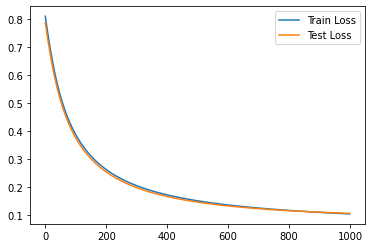

In [22]:
plt.plot(train_losses,label = "Train Loss")
plt.plot(test_losses,label = "Test Loss")
plt.legend()
plt.show()

## 06. Make Predictions

In [23]:
#get accuracy
with torch.no_grad():
  p_train = model(inputs)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(targets.numpy() == p_train)

train_acc

0.979002624671916

## 07. Evaluate Model

$accuracy = \frac{correct}{total}$

In [24]:
#get accuracy
with torch.no_grad():
  p_test = model(test_inputs)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(test_targets.numpy() == p_test)

test_acc

0.973404255319149

In [25]:
print(f'Train accuracy: {train_acc:0.4},Test accuracy: {test_acc:0.4}')

Train accuracy: 0.979,Test accuracy: 0.9734


## 08. Save and Load Data

### Save

In [26]:
#ordered dictionary
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1508, -0.2662, -0.4057, -0.4343, -0.3172, -0.3165, -0.1799, -0.4275,
                       -0.1576,  0.5342, -0.2567, -0.1242, -0.3573, -0.4940,  0.1829,  0.1717,
                        0.1940, -0.2416,  0.1650,  0.6361, -0.2158, -0.4852, -0.1893, -0.2817,
                       -0.2271, -0.1814, -0.4855, -0.2868, -0.2959, -0.5471]])),
             ('0.bias', tensor([0.4559]))])

In [27]:
#save the model
torch.save(model.state_dict(),'mymodel.pt')

In [28]:
!ls

mymodel.pt  sample_data


### Load

In [29]:
#recreate..
model2 = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [30]:
with torch.no_grad():
  p_test = model2(test_inputs)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(test_targets.numpy() == p_test)
test_acc 

0.973404255319149

### Download

In [31]:
from google.colab import files 
files.download('mymodel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>